In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# !pip install sktime

In [3]:
# !pip install seaborn

In [4]:
sktime_dir="/media/mastersupc/WorkSpace/pyenv3.8/lib/python3.8/site-packages/sktime/datasets/data/"
Airline= sktime_dir+"Airline/Airline.csv"
y = pd.read_csv(Airline, index_col=0, squeeze=True)
y.head()

Date
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
Name: Passengers, dtype: int64

In [5]:
from sktime.datasets import load_airline
df = load_airline()
df.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [20]:
df.index = pd.PeriodIndex(df.index, freq="M", name="Period")
df.name = "Number of airline passengers"

In [7]:
df.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

<AxesSubplot:xlabel='Period'>

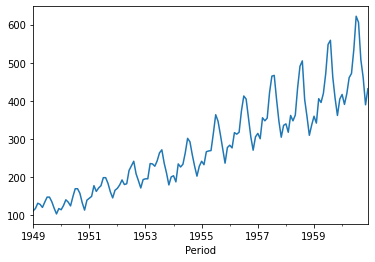

In [8]:
df.plot()

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

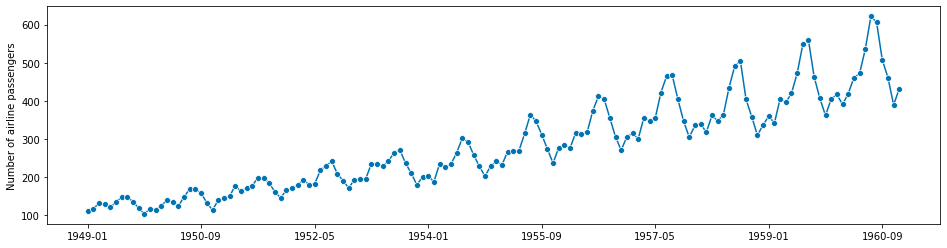

In [9]:
from sktime.utils.plotting import plot_series
plot_series(df)

## Train Test Split

In [10]:
from sktime.forecasting.model_selection import temporal_train_test_split

108 36


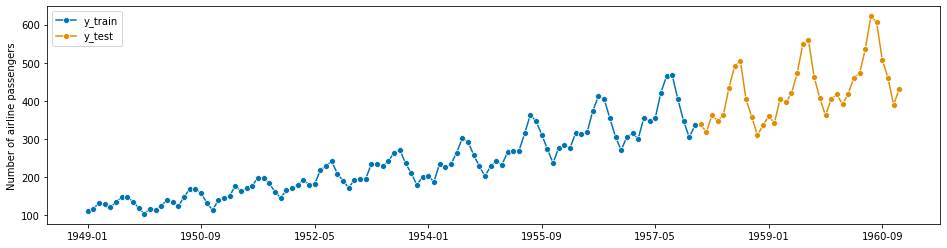

In [11]:
train, test = temporal_train_test_split(df, test_size=36)
plot_series(train, test, labels=["y_train", "y_test"])
print(train.shape[0], test.shape[0])

### Why not just use scikit-learn?

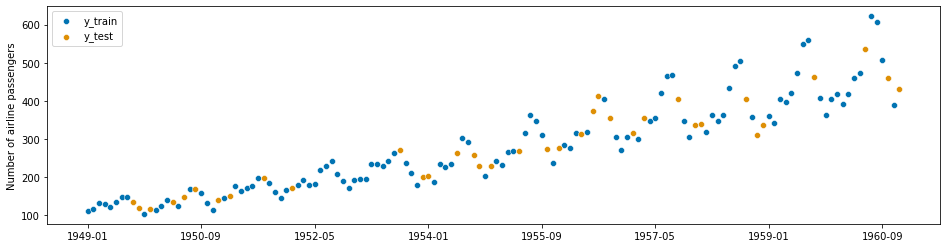

In [12]:
from sklearn.model_selection import train_test_split

skl_train, skl_test = train_test_split(df)
plot_series(skl_train.sort_index(), skl_test.sort_index(), labels=["y_train", "y_test"]);

## Forecasting

- we’re interested in using past data to make temporal forward predictions. 

- sktime provides common statistical forecasting algorithms and tools for building composite machine learning models.

In [21]:
from sktime.forecasting.base import ForecastingHorizon  # model time forecasting
from sktime.forecasting.theta import ThetaForecaster

In [15]:
fh = ForecastingHorizon(test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(train)

ThetaForecaster(sp=12)

**predict**

In [16]:
pred = forecaster.predict(fh)

**smape_loss**

In [17]:
from sktime.performance_metrics.forecasting import smape_loss

In [18]:
smape_loss(test, pred)

0.08661467699983212

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

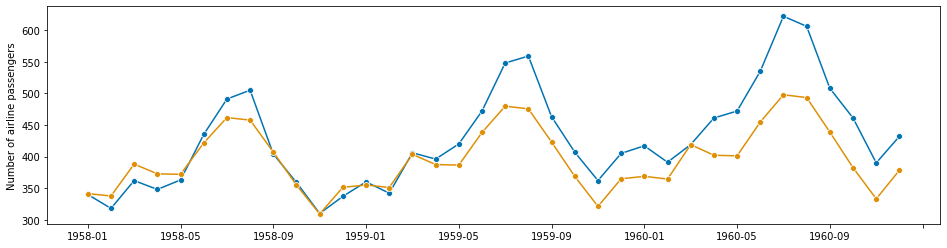

In [19]:
plot_series(test, pred)